# opencv course
# A presentation by Mohammad Kahkeshani
### instagram:
#### codevision_academy
#### kahkeshani_mohammad

In [1]:
import cv2
import matplotlib.pyplot as plt

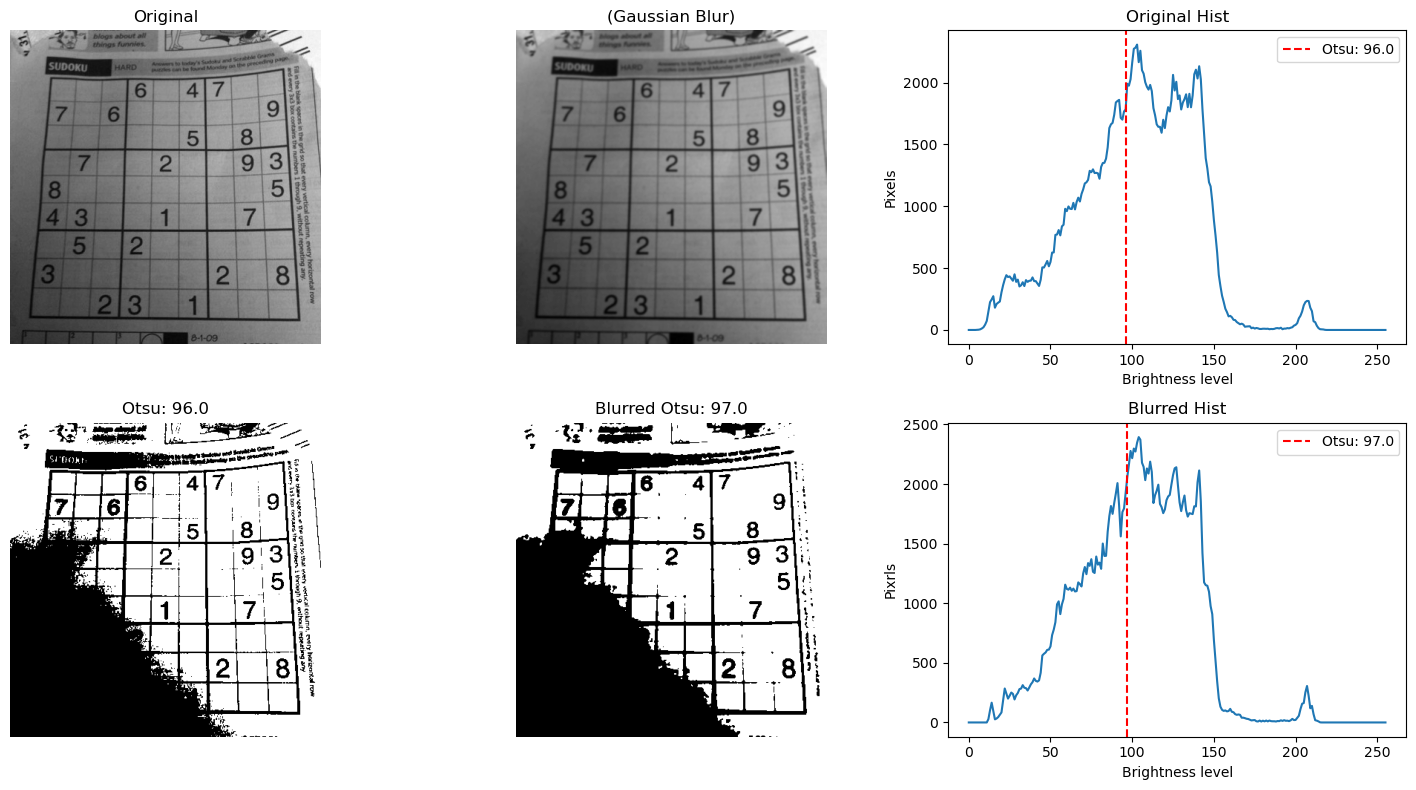

In [4]:
img = cv2.imread('images/sudoku.jpg', cv2.IMREAD_GRAYSCALE)

if img is None:
    print("Erorr")
else:
    # اعمال Gaussian Blur
    blurred_img = cv2.GaussianBlur(img, (5, 5), 0) 

    # Otsu 
    thresh_value_original, thresh_img_original = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Otsu on blurred
    thresh_value_blurred, thresh_img_blurred = cv2.threshold(blurred_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # histogram
    hist_original = cv2.calcHist([img], [0], None, [256], [0, 256])
    hist_blurred = cv2.calcHist([blurred_img], [0], None, [256], [0, 256])

    # show images
    plt.figure(figsize=(15, 8))

    plt.subplot(2, 3, 1);plt.imshow(img, cmap='gray');plt.title('Original');plt.axis('off')

    plt.subplot(2, 3, 2);plt.imshow(blurred_img, cmap='gray');plt.title('(Gaussian Blur)');plt.axis('off')

    plt.subplot(2, 3, 3);plt.plot(hist_original)
    plt.title('Original Hist')
    plt.xlabel('Brightness level')
    plt.ylabel('Pixels')
    plt.axvline(thresh_value_original, color='r', linestyle='--', label=f'Otsu: {thresh_value_original}')
    plt.legend()

    plt.subplot(2, 3, 4)
    plt.imshow(thresh_img_original, cmap='gray')
    plt.title(f'Otsu: {thresh_value_original}')
    plt.axis('off')

    plt.subplot(2, 3, 5)
    plt.imshow(thresh_img_blurred, cmap='gray')
    plt.title(f'Blurred Otsu: {thresh_value_blurred}')
    plt.axis('off')

    plt.subplot(2, 3, 6)
    plt.plot(hist_blurred)
    plt.title('Blurred Hist')
    plt.xlabel('Brightness level')
    plt.ylabel('Pixrls')
    plt.axvline(thresh_value_blurred, color='r', linestyle='--', label=f'Otsu: {thresh_value_blurred}')
    plt.legend()

    plt.tight_layout()
    plt.show()

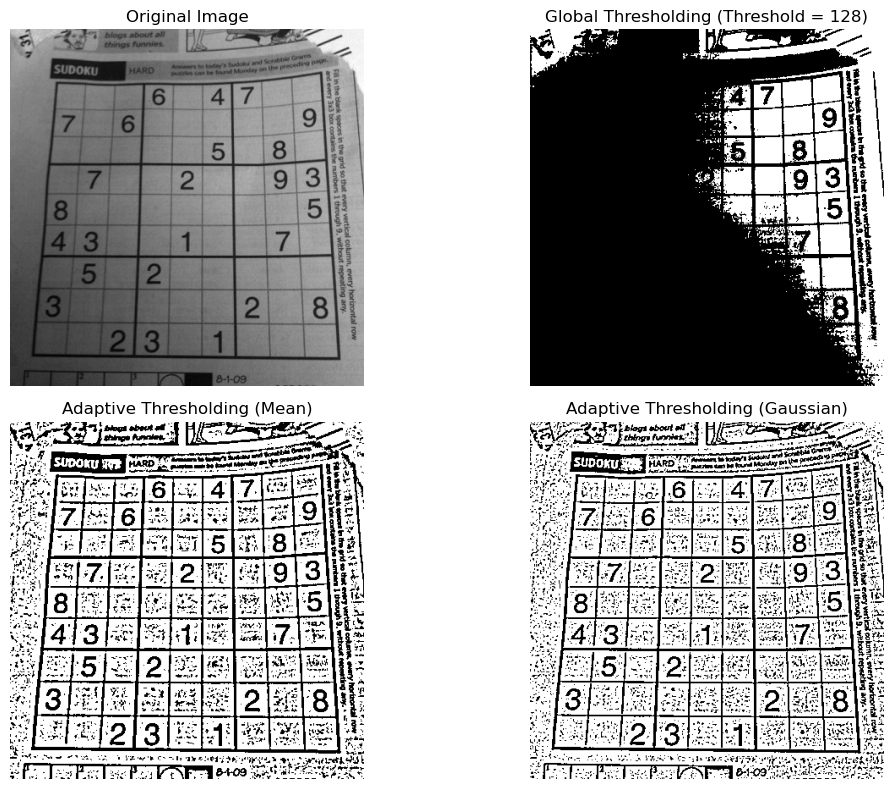

In [6]:
# Load the image
img = cv2.imread('images/sudoku.jpg', cv2.IMREAD_GRAYSCALE)

# Apply adaptive thresholding (mean method)
thresh_mean = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                    cv2.THRESH_BINARY, 11, 2)

# Apply adaptive thresholding (Gaussian method)
thresh_gauss = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                     cv2.THRESH_BINARY, 11, 2)

# Apply global thresholding (for comparison)
_, thresh_global = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

# Plot the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(thresh_global, cmap='gray')
plt.title('Global Thresholding (Threshold = 128)')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(thresh_mean, cmap='gray')
plt.title('Adaptive Thresholding (Mean)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(thresh_gauss, cmap='gray')
plt.title('Adaptive Thresholding (Gaussian)')
plt.axis('off')

plt.tight_layout()
plt.show()